In [1]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# create some data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape
# print np.cov(data.T)

(800, 2)


In [5]:
def pca(X, k=None):
    # set number of output dims
    if k is None:
        k = X.shape[1]
    
    # compute the covariance
    A = np.cov(X.T)
    
    # Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    #Z = X.dot(W)
    return eig_val, eig_vec

In [6]:
lam, W = pca(data)
print lam.shape, W.shape

(2,) (2, 2)


In [5]:
print lam
print W

[ 0.02399586  2.65237776]
[[-0.77478861 -0.63222038]
 [ 0.63222038 -0.77478861]]


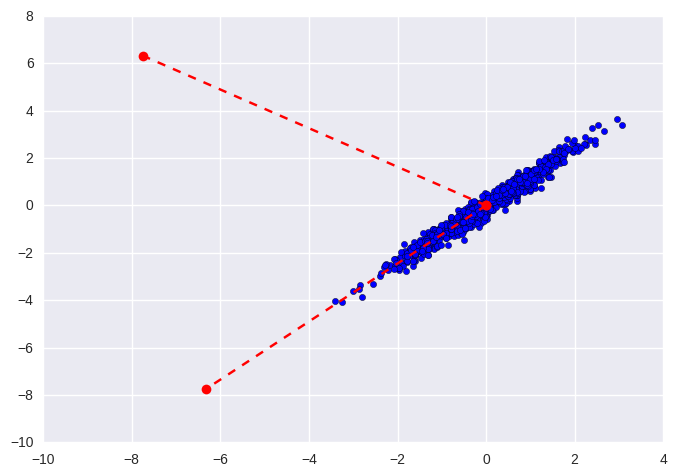

In [6]:
plt.figure(0)
sns.plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [7]:
Z = data.dot(W)
print Z.shape
print Z[:10]

(800, 2)
[[ 0.00609871 -1.88562642]
 [ 0.10310696  0.98291332]
 [-0.01355419 -0.5205251 ]
 [-0.01626638  1.14955643]
 [ 0.05171589 -1.10902904]
 [-0.23012076  0.0327491 ]
 [-0.1326355  -0.05225412]
 [ 0.22915131  0.03775309]
 [ 0.10476893 -2.55349895]
 [-0.21077385  0.35891057]]


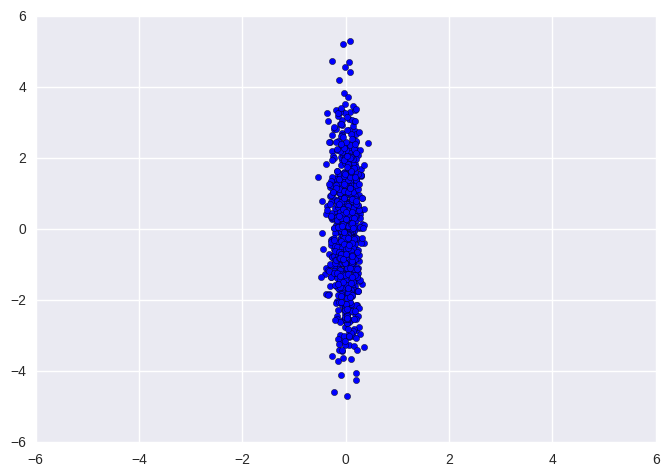

In [8]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
sns.plt.scatter(Z[:, 0], Z[:, 1])
# plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
# plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [9]:
np.cov(Z.T)

array([[  2.39958567e-02,  -1.61183818e-16],
       [ -1.61183818e-16,   2.65237776e+00]])

In [10]:
print np.cumsum(lam[::-1]/lam.sum())

[ 0.99103419  1.        ]


# PCA on MNIST

In [11]:
ds = pd.read_csv('../data/train.csv')
data = ds.values[:10000, 1:]
print data.shape

(10000, 784)


In [12]:
A = np.cov(data.T)
print A.shape

(784, 784)


In [13]:
eig_vals, eig_vecs = np.linalg.eig(A)
print eig_vals.shape

(784,)


In [14]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print len(info)

784


In [15]:
info = sorted(info, key=lambda z: z[0], reverse=True)

In [16]:
sorted_lambda = []
sorted_W = []

for ix in range(len(info)):
    sorted_lambda.append(info[ix][0])
    sorted_W.append(info[ix][1])

sorted_lambda = np.asarray(sorted_lambda)
sorted_W = np.asarray(sorted_W)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


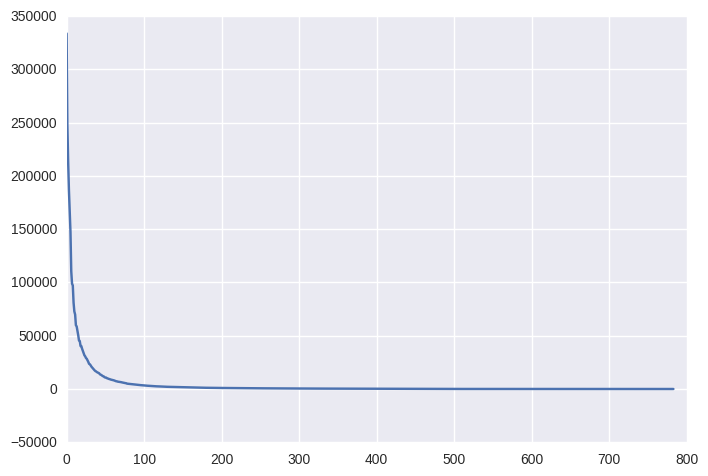

In [17]:
plt.plot(sorted_lambda)

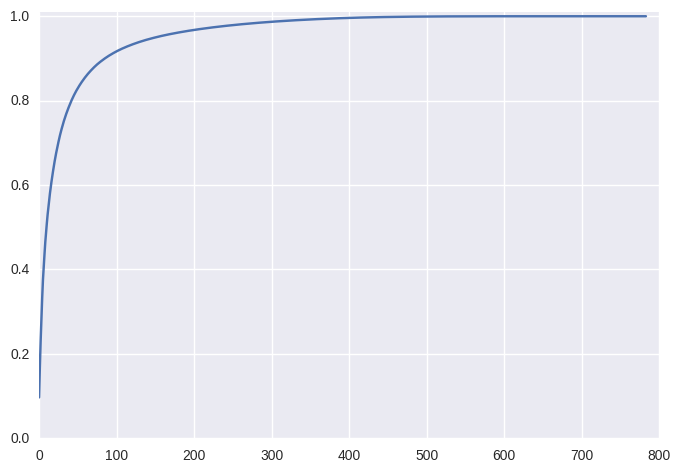

In [18]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [19]:
explained_variances_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())

In [20]:
for ix in range(explained_variances_ratio.shape[0]):
    if explained_variances_ratio[ix] <= 0.99:
        pass
    else:
        print ix
        break

326


In [21]:
k = 148
W = sorted_W[:, :k]
Z = data.dot(W)
print Z.shape

(10000, 148)


In [22]:
X_reconstruct = Z.dot(W.T)
print X_reconstruct.shape

print np.asarray(X_reconstruct[0], dtype='uint8')

(10000, 784)
[  0   2 254   0   0 253 255 254   3 255   1   2   0   0 252 255 253   0
   4   3   2   2   0   0   2   6   0   1 252 255 253 255   0 254   7   2
   5 255 248 244   3   3 253   1   1   1 251   8   0  13 253   3 255 250
 255   1   9  15 244 254 248  20   5 253 250 253   6 253   0   9 244  19
 255 243 248 253 241 249   0  12 247  31 254   8 249   1 248 252   0   8
 247  11   8 238   6  21  14  19 254 232 252 242 246 249   0 248   0   7
 245   4   9 233   9   0 254 239  37 234  12   0   6   9  17  18 250 250
 241  23 241  20 239  32  21  17 245 242 239  18 240 237 249 226  14 248
 236 239  31  27  23 252   1 244  29 255 252   9 222  17 234  13   2  32
   7  19 232   3  34 248 251   9  26 242   1 243   9 246 239 241  31 247
  33  21 226   8  41 226 249  32  23  13  33  18   4 236   2  32  17   1
 233   5 235 255   0  12 249 240 254  10  13 255   0   9 228 247   0  18
  18 251 232  13  15  13 243 247   0 252   6 244 236   5 238 253  10   3
 237   5 241 251  15   9  33  26 226  

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

X_ = pca.fit_transform(data)

In [25]:
X_re = pca.inverse_transform(X_)
X_re.shape

(10000, 784)

KeyError: 1

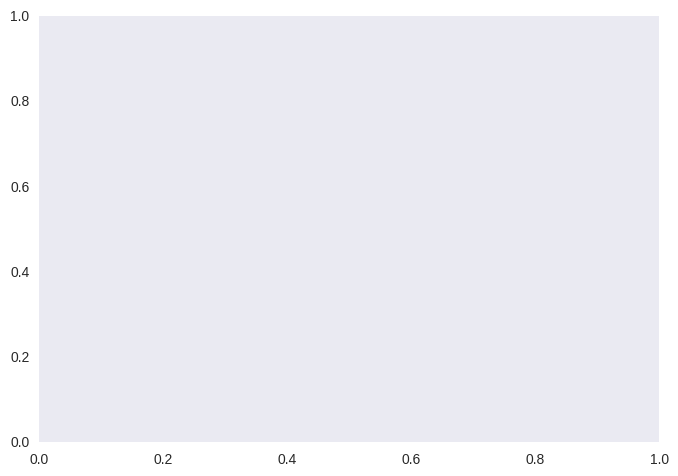

In [27]:
N = 1
plt.figure(0)
plt.grid("off")
plt.imshow(ds[N].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid("off")
im = (X_re[N]>0) * X_re[N]
plt.imshow(np.asarray(im.reshape((28, 28)), dtype='uint8'), cmap='gray')

plt.show()